# RNN "Many-2-Many" use-case. 

## Run sequences based on words.

### Dataset layout

#### Window 0:

```python
Sample: "Hello,world and ML"
Label: "world and ML"
```

#### Window 2:
```python
Sample: "world and ML"
Label: "and ML"
```

......


In [6]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import pprint as pp

# Load and clean data

In [7]:

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data = data.replace("\n", "")
pp.pprint(data)

('In the town of Athy one Jeremy Lanigan  Battered away til he hadnt a pound. '
 'His father died and made him a man again  Left him a farm and ten acres of '
 'ground. He gave a grand party for friends and relations Who didnt forget him '
 'when come to the wall, And if youll but listen Ill make your eyes glisten Of '
 'the rows and the ructions of Lanigans Ball. Myself to be sure got free '
 'invitation, For all the nice girls and boys I might ask, And just in a '
 'minute both friends and relations Were dancing round merry as bees round a '
 'cask. Judy ODaly, that nice little milliner, She tipped me a wink for to '
 'give her a call, And I soon arrived with Peggy McGilligan Just in time for '
 'Lanigans Ball. There were lashings of punch and wine for the ladies, '
 'Potatoes and cakes; there was bacon and tea, There were the Nolans, Dolans, '
 'OGradys Courting the girls and dancing away. Songs they went round as plenty '
 'as water, The harp that once sounded in Taras old hall,Swe

# Create tokenizer and calcuate word count

In [8]:
tokenizer = Tokenizer()
corpus=[data]
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


pp.pprint(total_words)
pp.pprint(corpus)
pp.pprint(tokenizer.word_index)

263
['In the town of Athy one Jeremy Lanigan  Battered away til he hadnt a pound. '
 'His father died and made him a man again  Left him a farm and ten acres of '
 'ground. He gave a grand party for friends and relations Who didnt forget him '
 'when come to the wall, And if youll but listen Ill make your eyes glisten Of '
 'the rows and the ructions of Lanigans Ball. Myself to be sure got free '
 'invitation, For all the nice girls and boys I might ask, And just in a '
 'minute both friends and relations Were dancing round merry as bees round a '
 'cask. Judy ODaly, that nice little milliner, She tipped me a wink for to '
 'give her a call, And I soon arrived with Peggy McGilligan Just in time for '
 'Lanigans Ball. There were lashings of punch and wine for the ladies, '
 'Potatoes and cakes; there was bacon and tea, There were the Nolans, Dolans, '
 'OGradys Courting the girls and dancing away. Songs they went round as plenty '
 'as water, The harp that once sounded in Taras old hall

# Create sequences based on the corpus

In [9]:
input_sequences = tokenizer.texts_to_sequences(corpus)
pp.pprint(input_sequences)

[[4,
  2,
  66,
  8,
  67,
  68,
  69,
  70,
  71,
  40,
  20,
  21,
  72,
  3,
  73,
  16,
  74,
  75,
  1,
  76,
  33,
  3,
  77,
  22,
  41,
  33,
  3,
  78,
  1,
  79,
  80,
  8,
  81,
  21,
  82,
  3,
  83,
  84,
  7,
  42,
  1,
  43,
  85,
  86,
  87,
  33,
  44,
  88,
  13,
  2,
  45,
  1,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  8,
  2,
  98,
  1,
  2,
  99,
  8,
  9,
  10,
  46,
  13,
  100,
  101,
  23,
  102,
  103,
  7,
  5,
  2,
  47,
  17,
  1,
  24,
  6,
  104,
  105,
  1,
  48,
  4,
  3,
  106,
  107,
  42,
  1,
  43,
  11,
  49,
  25,
  50,
  18,
  108,
  25,
  3,
  109,
  110,
  111,
  26,
  47,
  112,
  113,
  14,
  51,
  52,
  3,
  114,
  7,
  13,
  115,
  27,
  3,
  116,
  1,
  6,
  53,
  117,
  118,
  119,
  120,
  48,
  4,
  54,
  7,
  9,
  10,
  28,
  11,
  121,
  8,
  122,
  1,
  123,
  7,
  2,
  124,
  125,
  1,
  126,
  28,
  34,
  127,
  1,
  128,
  28,
  11,
  2,
  129,
  130,
  131,
  132,
  2,
  17,
  1,
  49,
  40,
  133,
  19,
  134,
  25

# Create dataset, we will prepare dataset for stateful seq-seq. 

In [10]:
window_size = 2
batch_size = 1
sequence_len = 11
 
input_sequences = tf.expand_dims(input_sequences[0], axis=-1)
dataset = tf.data.Dataset.from_tensor_slices(input_sequences)
dataset = dataset.window(window_size, 1, 1, True)
dataset = dataset.flat_map(lambda window: window.padded_batch(window_size).map(lambda x: (x[:-1], x[1:])))
dataset = dataset.padded_batch(batch_size, drop_remainder=True)
dataset

for item in dataset.take(2):
  pp.pprint(item)
  pp.pprint("\n")

(<tf.Tensor: shape=(1, 1, 1), dtype=int32, numpy=array([[[4]]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1, 1), dtype=int32, numpy=array([[[2]]], dtype=int32)>)
'\n'
(<tf.Tensor: shape=(1, 1, 1), dtype=int32, numpy=array([[[2]]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1, 1), dtype=int32, numpy=array([[[66]]], dtype=int32)>)
'\n'


# Train model

## Hyperparemeter

In [11]:
epochs = 300
units = 64
embeding_dim = 215
models = {}

### Helper callbacks, stop training early or evaluate learning-rate (NOT USE ALL OF THEM HERE)

In [12]:
class StopCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.reset_states()
    #if float(logs.get('loss')) < 0.38:
      #print("\n[mae={}, loss={}]".format(logs.get('mae'), logs.get('loss')))
      #self.model.stop_training = True
stopCallback2 = StopCallback2()

In [13]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min")

In [14]:
import matplotlib.pyplot as plt

def fit(*layers):
  tf.keras.backend.clear_session()
  tf.random.set_seed(51)
  np.random.seed(51)

  model = Sequential()
  model.add(Embedding(total_words, embeding_dim, input_length=window_size - 1,  batch_input_shape=[1, window_size - 1]))# -1, cause the last element from origin is a label.
  [model.add(layer) for layer in layers]
  model.add(Dense(total_words, activation=tf.keras.activations.relu))
  model.add(Dense(total_words, activation=tf.keras.activations.softmax))
  
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
  history = model.fit(dataset, epochs=epochs, verbose=1, callbacks=[earlyStopping])

  weights = model.layers[0].get_weights()[0]
  pp.pprint(weights.shape)

  def plot_graphs(m0, m1):
    plt.plot(history.history[m0], history.history[m1],)
    plt.xlabel(m0)
    plt.ylabel(m1)
    plt.show() 

  plot_graphs('accuracy','loss') 
  return model

## Train different models

Epoch 1/300
516/516 [==============================] - 2s 2ms/step - loss: 5.5134 - accuracy: 0.0486
Epoch 2/300
516/516 [==============================] - 1s 2ms/step - loss: 4.6543 - accuracy: 0.0615
Epoch 3/300
516/516 [==============================] - 1s 1ms/step - loss: 4.2289 - accuracy: 0.0791
Epoch 4/300
516/516 [==============================] - 1s 1ms/step - loss: 3.8812 - accuracy: 0.1304
Epoch 5/300
516/516 [==============================] - 1s 2ms/step - loss: 3.4629 - accuracy: 0.1783
Epoch 6/300
516/516 [==============================] - 1s 2ms/step - loss: 3.0658 - accuracy: 0.2578
Epoch 7/300
516/516 [==============================] - 1s 2ms/step - loss: 2.6584 - accuracy: 0.3073
Epoch 8/300
516/516 [==============================] - 1s 2ms/step - loss: 2.2051 - accuracy: 0.3986
Epoch 9/300
516/516 [==============================] - 1s 2ms/step - loss: 1.7054 - accuracy: 0.5238
Epoch 10/300
516/516 [==============================] - 1s 1ms/step - loss: 1.2344 - accura

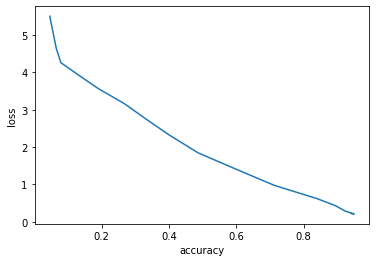

In [15]:
models["LSTM"] = fit(LSTM(units, return_sequences=True, stateful=True))

Epoch 1/300
516/516 [==============================] - 4s 2ms/step - loss: 5.5299 - accuracy: 0.0443
Epoch 2/300
516/516 [==============================] - 1s 2ms/step - loss: 4.8118 - accuracy: 0.0624
Epoch 3/300
516/516 [==============================] - 1s 2ms/step - loss: 4.3196 - accuracy: 0.0752
Epoch 4/300
516/516 [==============================] - 1s 2ms/step - loss: 4.0864 - accuracy: 0.1011
Epoch 5/300
516/516 [==============================] - 1s 2ms/step - loss: 3.8311 - accuracy: 0.1253
Epoch 6/300
516/516 [==============================] - 1s 3ms/step - loss: 3.6549 - accuracy: 0.1329
Epoch 7/300
516/516 [==============================] - 1s 2ms/step - loss: 3.5039 - accuracy: 0.1393
Epoch 8/300
516/516 [==============================] - 1s 2ms/step - loss: 3.3362 - accuracy: 0.1633
Epoch 9/300
516/516 [==============================] - 1s 3ms/step - loss: 3.1727 - accuracy: 0.1834
Epoch 10/300
516/516 [==============================] - 1s 2ms/step - loss: 2.9988 - accura

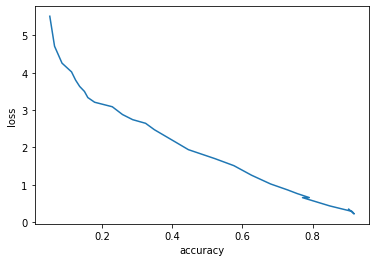

In [16]:
models["Bi-LSTM"] = fit(Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    LSTM(units, return_sequences=True))

Epoch 1/300
516/516 [==============================] - 7s 3ms/step - loss: 5.5142 - accuracy: 0.0296
Epoch 2/300
516/516 [==============================] - 2s 3ms/step - loss: 4.7531 - accuracy: 0.0411
Epoch 3/300
516/516 [==============================] - 2s 3ms/step - loss: 4.3133 - accuracy: 0.0624
Epoch 4/300
516/516 [==============================] - 2s 3ms/step - loss: 4.2228 - accuracy: 0.0651
Epoch 5/300
516/516 [==============================] - 2s 4ms/step - loss: 4.2062 - accuracy: 0.0848
Epoch 6/300
516/516 [==============================] - 2s 4ms/step - loss: 4.1500 - accuracy: 0.0760
Epoch 7/300
516/516 [==============================] - 2s 3ms/step - loss: 4.1783 - accuracy: 0.0921
Epoch 8/300
516/516 [==============================] - 2s 3ms/step - loss: 3.9986 - accuracy: 0.0915
Epoch 9/300
516/516 [==============================] - 2s 3ms/step - loss: 4.2563 - accuracy: 0.0934
(263, 215)


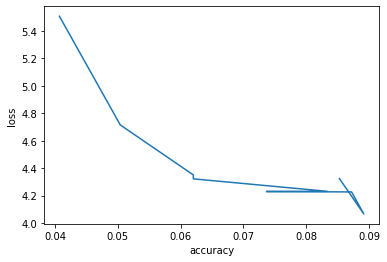

In [17]:
models["2 X Bi-LSTM"] = fit(Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    LSTM(units, return_sequences=True,))

Epoch 1/300
516/516 [==============================] - 2s 2ms/step - loss: 5.4907 - accuracy: 0.0424
Epoch 2/300
516/516 [==============================] - 1s 2ms/step - loss: 4.4875 - accuracy: 0.0802
Epoch 3/300
516/516 [==============================] - 1s 2ms/step - loss: 3.8815 - accuracy: 0.1446
Epoch 4/300
516/516 [==============================] - 1s 2ms/step - loss: 3.2327 - accuracy: 0.2108
Epoch 5/300
516/516 [==============================] - 1s 2ms/step - loss: 2.6016 - accuracy: 0.3173
Epoch 6/300
516/516 [==============================] - 1s 2ms/step - loss: 2.0920 - accuracy: 0.3960
Epoch 7/300
516/516 [==============================] - 1s 2ms/step - loss: 1.6442 - accuracy: 0.4571
Epoch 8/300
516/516 [==============================] - 1s 2ms/step - loss: 1.2807 - accuracy: 0.5750
Epoch 9/300
516/516 [==============================] - 1s 2ms/step - loss: 1.0093 - accuracy: 0.6980
Epoch 10/300
516/516 [==============================] - 1s 2ms/step - loss: 0.7572 - accura

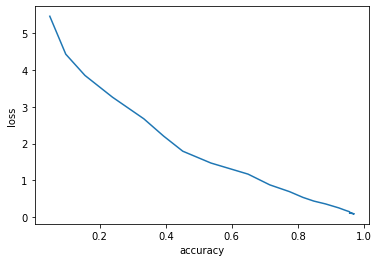

In [18]:
models["GRU"] = fit(GRU(units, return_sequences=True, stateful=True))

Epoch 1/300
516/516 [==============================] - 3s 2ms/step - loss: 5.5021 - accuracy: 0.0352
Epoch 2/300
516/516 [==============================] - 1s 2ms/step - loss: 4.6518 - accuracy: 0.0726
Epoch 3/300
516/516 [==============================] - 1s 2ms/step - loss: 4.1363 - accuracy: 0.1078
Epoch 4/300
516/516 [==============================] - 1s 2ms/step - loss: 3.7358 - accuracy: 0.1265
Epoch 5/300
516/516 [==============================] - 1s 2ms/step - loss: 3.4477 - accuracy: 0.1835
Epoch 6/300
516/516 [==============================] - 1s 2ms/step - loss: 3.1321 - accuracy: 0.2186
Epoch 7/300
516/516 [==============================] - 1s 3ms/step - loss: 2.7987 - accuracy: 0.2659
Epoch 8/300
516/516 [==============================] - 1s 2ms/step - loss: 2.5649 - accuracy: 0.3478
Epoch 9/300
516/516 [==============================] - 1s 2ms/step - loss: 2.3076 - accuracy: 0.3614
Epoch 10/300
516/516 [==============================] - 1s 3ms/step - loss: 2.1644 - accura

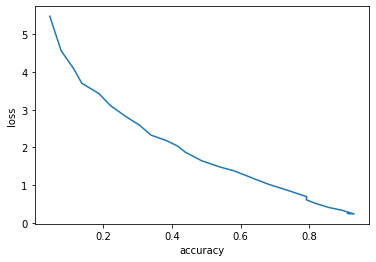

In [19]:
models["Bi-GRU"] = fit(Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    GRU(units, return_sequences=True))

Epoch 1/300
516/516 [==============================] - 6s 3ms/step - loss: 5.4983 - accuracy: 0.0472
Epoch 2/300
516/516 [==============================] - 2s 3ms/step - loss: 4.6605 - accuracy: 0.0602
Epoch 3/300
516/516 [==============================] - 2s 3ms/step - loss: 4.4778 - accuracy: 0.0900
Epoch 4/300
516/516 [==============================] - 2s 3ms/step - loss: 4.1653 - accuracy: 0.1037
Epoch 5/300
516/516 [==============================] - 2s 3ms/step - loss: 3.8533 - accuracy: 0.1234
Epoch 6/300
516/516 [==============================] - 2s 3ms/step - loss: 3.9659 - accuracy: 0.1232
(263, 215)


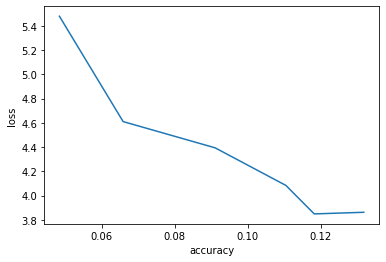

In [20]:
models["2 X Bi-GRU"] = fit(Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    GRU(units, return_sequences=True))

# Use model to predicte test with starting words

In [21]:
for key in models:
  model = models[key]
  seed_text = "Laurence went to dublin"
  next_words = 100
    
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=window_size, padding='post')

    #pp.pprint("seed_test:{} ==> {}\n".format(seed_text, token_list))

    predicted = model.predict_classes(token_list, verbose=0)
    output_word = tokenizer.sequences_to_texts(predicted)

    #pp.pprint("predicted:{} ==> {}\n".format(predicted, output_word))

    seed_text += (" " + output_word[0])
  
  print("------------------------------\n")
  pp.pprint(key)
  pp.pprint(seed_text)  
  print("------------------------------\n")
  print()

------------------------------

'LSTM'
('Laurence went to dublin her were the runctions nice and girls milliner i all '
 'stepped at three brooks spent me three a spent weeks up to learning learning '
 'new new steps steps for for lanigans lanigans ball ball boys boys were were '
 'all runctions merry myself and got all as the nice girls girls in the their '
 'row girls miss to fainted her as a a rose rose some his of from the from '
 'lads under too the all same their a girls girls got got all a a minute rose '
 'judy judy odaly as that plenty happened as the stepped girls in and their i '
 'girls spent they their got girls and got got all all entangled an and that '
 'that put happened his satisfaction right in leg at put in new again steps '
 'she for stepped lanigans three ball long out long and weeks i i spent spent '
 'up up in in dublin dublin learning three new long steps in for for lanigans '
 'lanigans ball ball boys boys were were all runctions merry myself and got '
 'all a